In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
int_matches = pd.read_csv('./datasets/international_matches_1993_08-2022-06.csv', parse_dates = ['date'])
# int_matches =  matches.replace({'Germany DR': 'Germany', 'China': 'China PR'})
int_matches.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [3]:
int_matches.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

<AxesSubplot:>

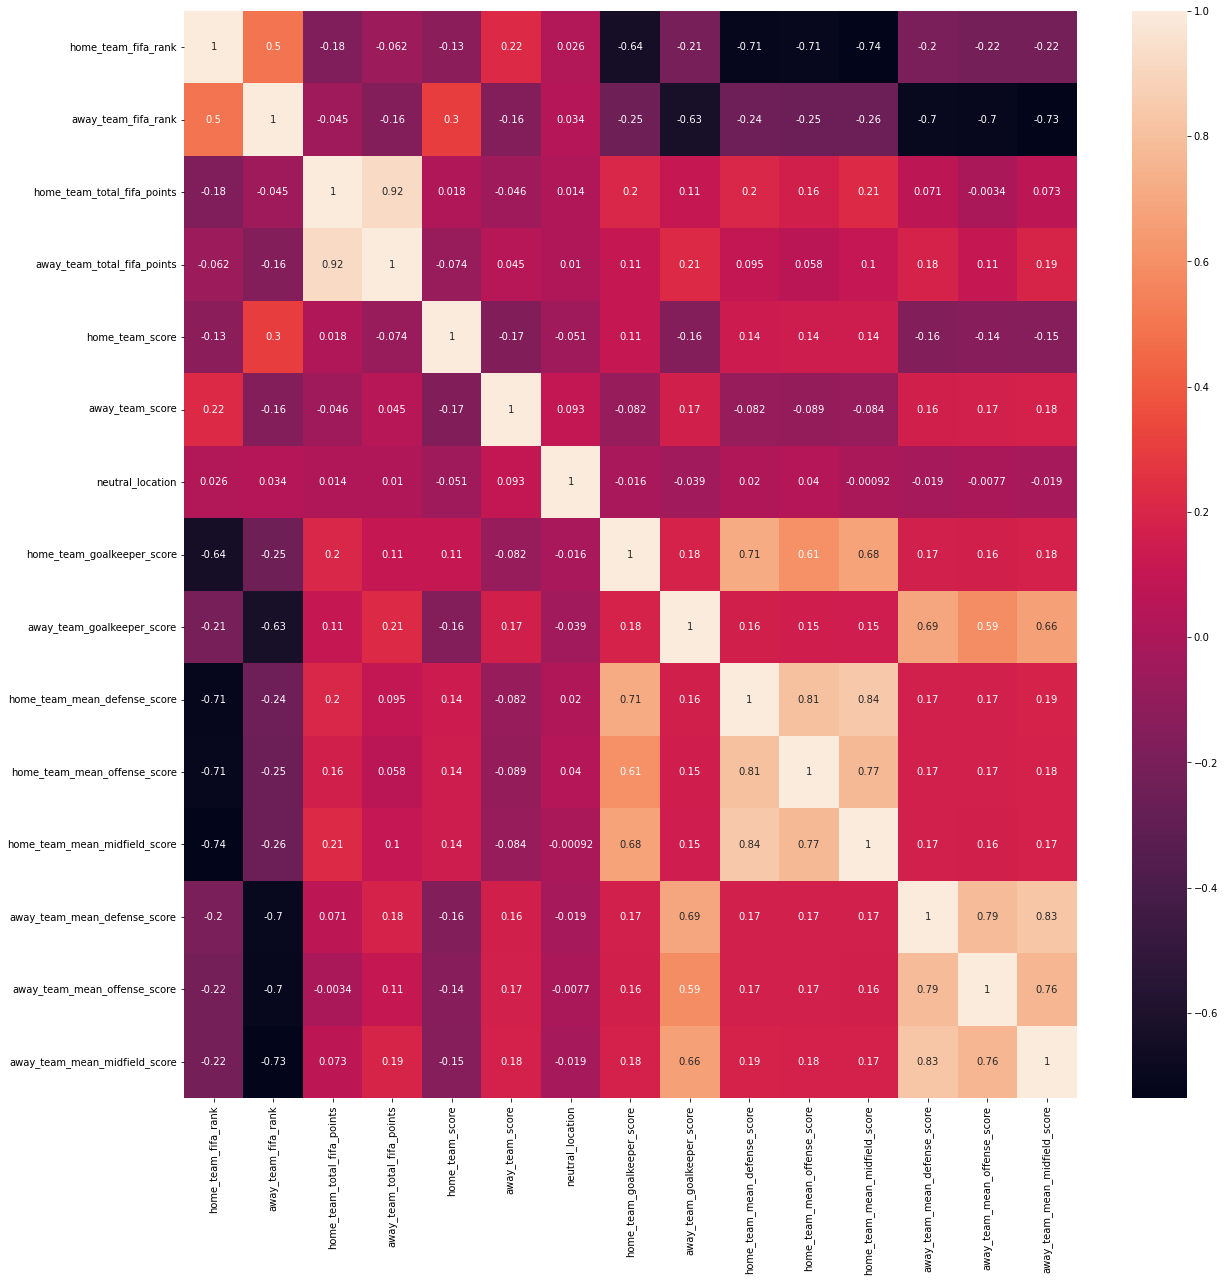

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
corr1 = int_matches.corr()
corr1
sns.heatmap(corr1,annot=True)

In [5]:
def f(x):
    if (x == 0):
        return 1
    elif (x > 0):
        return 0
    elif (x < 0):
        return 2

# feature generation
int_matches['rank_difference'] = int_matches['home_team_fifa_rank'] - int_matches['away_team_fifa_rank']
int_matches['average_rank'] = (int_matches['home_team_fifa_rank'] + int_matches['away_team_fifa_rank'])/2
int_matches['score_difference'] = int_matches['home_team_score'] - int_matches['away_team_score']
int_matches['is_win_loss_draw'] = [f(xi) for xi in int_matches['score_difference']]
int_matches['is_won'] = int_matches['score_difference'] > 0 # take draw as loss
int_matches['is_stake'] = int_matches['tournament'] != 'Friendly'

int_matches.to_csv("./datasets/20220919_out.csv")